In [2]:
# 宣告大量陣列 and read file
base = 2

#format: tensor_(#spin)
for n in range (0, 4):
    N=4096*pow(base, n)
    print('tensor'+'_'+str(N))
    locals()['tensor'+'_'+str(N)] = [] 

# format: gpu_(#spin)
for n in range (0, 4):
    N=4096*pow(base, n)
    print('gpu'+'_'+str(N))
    locals()['gpu'+'_'+str(N)] = []


     

tensor_4096
tensor_8192
tensor_16384
tensor_32768
gpu_4096
gpu_8192
gpu_16384
gpu_32768


In [3]:
for n in range (0, 4): #range: 0, 4
    N=4096*pow(base, n)

    for m in range (0, 8): #range: 0, 8
        M=4*pow(base, m)
        #print("tc_"+str(M)+'_'+str(N)+".out")
        infile = open("./Results/tc_"+str(M)+'_'+str(N)+".out", 'r')
        
        for i in range (6): #redundant lune
            line = infile.readline()
        line = infile.readline()
        words = line.split()
        #print(words[3])
        locals()['tensor'+'_'+str(N)].append(words[3])


for n in range (0, 4): #range: 0, 4
    N=4096*pow(base, n)

    for m in range (0, 8): #range: 0, 8
        M=4*pow(base, m)
        #print("tc_"+str(M)+'_'+str(N)+".out")
        infile = open("./Results/no_"+str(M)+'_'+str(N)+".out", 'r')
        
        for i in range (6): #redundant lune
            line = infile.readline()
        line = infile.readline()
        words = line.split()
        #print(words[3])
        locals()['gpu'+'_'+str(N)].append(words[3])



for n in range (0, 4):
    N=4096*pow(base, n)
    for i in range (len(locals()['gpu'+'_'+str(N)])):
        locals()['tensor'+'_'+str(N)][i] = float(locals()['tensor'+'_'+str(N)][i])
        locals()['tensor'+'_'+str(N)][i] = round(float(locals()['tensor'+'_'+str(N)][i])*10, 2)
        locals()['gpu'+'_'+str(N)][i] = float( locals()['gpu'+'_'+str(N)][i])
        locals()['gpu'+'_'+str(N)][i] = round(float(locals()['gpu'+'_'+str(N)][i])*10, 2)
print(tensor_4096)
print(tensor_8192)
print(tensor_16384)
print(tensor_32768)
print(gpu_4096)
print(gpu_8192)
print(gpu_16384)
print(gpu_32768)


[1.42, 1.44, 1.38, 1.24, 1.01, 1.17, 2.33, 3.71]
[3.11, 3.05, 2.98, 2.57, 1.97, 2.53, 5.0, 8.89]
[6.58, 6.77, 6.81, 6.37, 5.65, 7.4, 14.19, 25.18]
[16.9, 16.75, 16.68, 15.27, 15.61, 22.97, 43.46, 77.04]
[1.43, 1.42, 1.38, 1.27, 1.01, 1.18, 2.35, 3.74]
[3.06, 3.02, 3.15, 2.71, 2.23, 3.34, 6.08, 10.44]
[6.57, 6.75, 6.77, 6.29, 6.49, 9.79, 18.36, 33.67]
[15.4, 19.13, 16.34, 15.85, 17.66, 31.98, 57.41, 96.78]


In [4]:
#Tohoku
tohoku_FPGA_4096  = [4.61, 4.71, 5.11, 5.81, 0.0, 0.0, 0.0, 0.0] 
tohoku_FPGA_8192  = [17.45, 17.79, 19.87, 20.73, 0.0, 0.0, 0.0, 0.0]
tohoku_FPGA_16384 = [65.77, 68.97, 70.33, 0.0, 0.0, 0.0, 0.0, 0.0]
tohoku_FPGA_32768 = [264.93, 270.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

tohoku_GPU_4096 = [12, 13, 16, 22, 32, 66, 230, 1000]
tohoku_GPU_8192 = [35, 43, 48, 59, 70, 128, 256, 1020]
tohoku_GPU_16384 = [140.4, 156.4, 166.4, 217.6, 230, 512, 1024, 2048]
tohoku_GPU_32768 = [1024, 1024, 1030, 1050, 1331.2, 2457.6, 5324.8, 9830.4]

## 畫圖

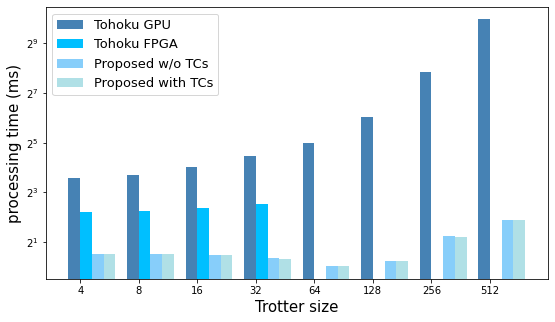

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

fig, ax = plt.subplots(figsize=(9, 5))
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 15
rcParams['legend.fontsize'] = 13 # 圖標的大小
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

XX = [4, 8, 16, 32, 64, 128, 256, 512]
x = np.arange(len(XX))
width = 0.2
  # mediumturquoise lightseagreen powderblue (v)  steelblue lightskyblue cadetblue
plt.bar(x, tohoku_GPU_4096, width, color='steelblue', label='Tohoku GPU')
plt.bar(x + width*1, tohoku_FPGA_4096, width, color='deepskyblue', label='Tohoku FPGA')
plt.bar(x + width*2, gpu_4096, width, color='lightskyblue', label='Proposed w/o TCs')
plt.bar(x + width*3, tensor_4096, width, color='powderblue', label='Proposed with TCs')
# darkolivegreen  olivedrab   yellowgreen
plt.xticks(x + width / 2, XX)
plt.xlabel('Trotter size', fontsize = 15)
plt.ylabel('processing time (ms)',  fontsize = 15)
ax.set_yscale('log', base=2)
#plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.legend()
plt.show()

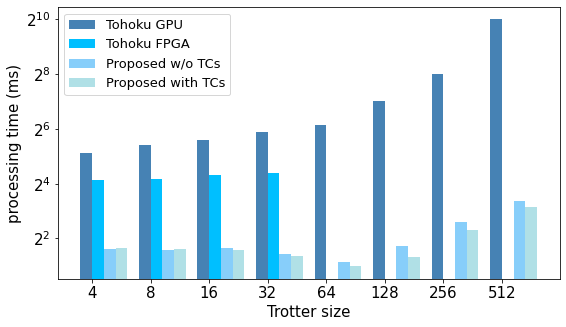

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

fig, ax = plt.subplots(figsize=(9, 5))
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 15
rcParams['legend.fontsize'] = 13 # 圖標的大小
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

XX = [4, 8, 16, 32, 64, 128, 256, 512]
x = np.arange(len(XX))
width = 0.2
  # mediumturquoise lightseagreen powderblue (v)  steelblue lightskyblue cadetblue
plt.bar(x, tohoku_GPU_8192, width, color='steelblue', label='Tohoku GPU')
plt.bar(x + width*1, tohoku_FPGA_8192, width, color='deepskyblue', label='Tohoku FPGA')
plt.bar(x + width*2, gpu_8192, width, color='lightskyblue', label='Proposed w/o TCs')
plt.bar(x + width*3, tensor_8192, width, color='powderblue', label='Proposed with TCs')
# darkolivegreen  olivedrab   yellowgreen
plt.xticks(x + width / 2, XX)
plt.xlabel('Trotter size', fontsize = 15)
plt.ylabel('processing time (ms)',  fontsize = 15)
ax.set_yscale('log', base=2)
#plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.legend()
plt.show()

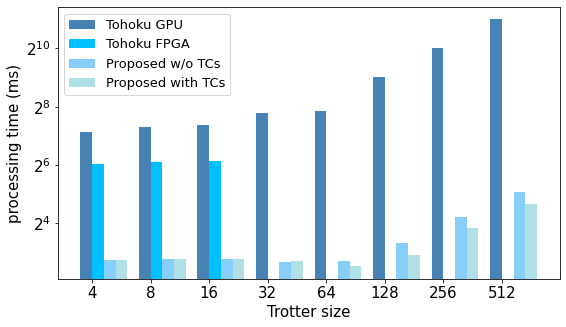

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

fig, ax = plt.subplots(figsize=(9, 5))
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 15
rcParams['legend.fontsize'] = 13 # 圖標的大小
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

XX = [4, 8, 16, 32, 64, 128, 256, 512]
x = np.arange(len(XX))
width = 0.2
  # mediumturquoise lightseagreen powderblue (v)  steelblue lightskyblue cadetblue
plt.bar(x, tohoku_GPU_16384, width, color='steelblue', label='Tohoku GPU')
plt.bar(x + width*1, tohoku_FPGA_16384, width, color='deepskyblue', label='Tohoku FPGA')
plt.bar(x + width*2, gpu_16384, width, color='lightskyblue', label='Proposed w/o TCs')
plt.bar(x + width*3, tensor_16384, width, color='powderblue', label='Proposed with TCs')
# darkolivegreen  olivedrab   yellowgreen
plt.xticks(x + width / 2, XX)
plt.xlabel('Trotter size', fontsize = 15)
plt.ylabel('processing time (ms)',  fontsize = 15)
ax.set_yscale('log', base=2)
#plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.legend()
plt.show()

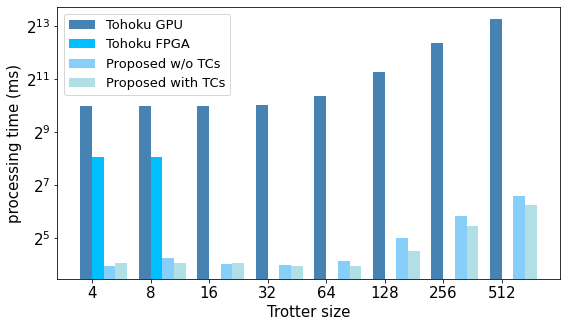

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

fig, ax = plt.subplots(figsize=(9, 5))
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 15
rcParams['legend.fontsize'] = 13 # 圖標的大小
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

XX = [4, 8, 16, 32, 64, 128, 256, 512]
x = np.arange(len(XX))
width = 0.2
  # mediumturquoise lightseagreen powderblue (v)  steelblue lightskyblue cadetblue
plt.bar(x, tohoku_GPU_32768, width, color='steelblue', label='Tohoku GPU')
plt.bar(x + width*1, tohoku_FPGA_32768, width, color='deepskyblue', label='Tohoku FPGA')
plt.bar(x + width*2, gpu_32768, width, color='lightskyblue', label='Proposed w/o TCs')
plt.bar(x + width*3, tensor_32768, width, color='powderblue', label='Proposed with TCs')
# darkolivegreen  olivedrab   yellowgreen
plt.xticks(x + width / 2, XX)
plt.xlabel('Trotter size', fontsize = 15)
plt.ylabel('processing time (ms)',  fontsize = 15)
ax.set_yscale('log', base=2)
#plt.title('Spin number = 32768')
#plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.legend()
plt.show()

## 算倍率

In [9]:
print('tensor_4096')
print(tensor_4096)
print('tensor_8192')
print(tensor_8192)
print('tensor_16384')
print(tensor_16384)
print('tensor_32768')
print(tensor_32768)

print('gpu_4096')
print(gpu_4096)
print('gpu_8192')
print(gpu_8192)
print('gpu_16384')
print(gpu_16384)
print('gpu_32768')
print(gpu_32768)

print('tohoku_FPGA_4096')
print(tohoku_FPGA_4096)
print('tohoku_FPGA_8192')
print(tohoku_FPGA_8192)
print('tohoku_FPGA_16384')
print(tohoku_FPGA_16384)
print('tohoku_FPGA_32768')
print(tohoku_FPGA_32768)

print('tohoku_GPU_4096')
print(tohoku_GPU_4096)
print('tohoku_GPU_8192')
print(tohoku_GPU_8192)
print('tohoku_GPU_16384')
print(tohoku_GPU_16384)
print('tohoku_GPU_32768')
print(tohoku_GPU_32768)

tensor_4096
[1.42, 1.44, 1.38, 1.24, 1.01, 1.17, 2.33, 3.71]
tensor_8192
[3.11, 3.05, 2.98, 2.57, 1.97, 2.53, 5.0, 8.89]
tensor_16384
[6.58, 6.77, 6.81, 6.37, 5.65, 7.4, 14.19, 25.18]
tensor_32768
[16.9, 16.75, 16.68, 15.27, 15.61, 22.97, 43.46, 77.04]
gpu_4096
[1.43, 1.42, 1.38, 1.27, 1.01, 1.18, 2.35, 3.74]
gpu_8192
[3.06, 3.02, 3.15, 2.71, 2.23, 3.34, 6.08, 10.44]
gpu_16384
[6.57, 6.75, 6.77, 6.29, 6.49, 9.79, 18.36, 33.67]
gpu_32768
[15.4, 19.13, 16.34, 15.85, 17.66, 31.98, 57.41, 96.78]
tohoku_FPGA_4096
[4.61, 4.71, 5.11, 5.81, 0.0, 0.0, 0.0, 0.0]
tohoku_FPGA_8192
[17.45, 17.79, 19.87, 20.73, 0.0, 0.0, 0.0, 0.0]
tohoku_FPGA_16384
[65.77, 68.97, 70.33, 0.0, 0.0, 0.0, 0.0, 0.0]
tohoku_FPGA_32768
[264.93, 270.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
tohoku_GPU_4096
[12, 13, 16, 22, 32, 66, 230, 1000]
tohoku_GPU_8192
[35, 43, 48, 59, 70, 128, 256, 1020]
tohoku_GPU_16384
[140.4, 156.4, 166.4, 217.6, 230, 512, 1024, 2048]
tohoku_GPU_32768
[1024, 1024, 1030, 1050, 1331.2, 2457.6, 5324.8, 9830.4

## we compare to tohoku GPU

## we compare to tohoku FPGA